![dsc-logo](https://raw.githubusercontent.com/divyake/Cysec-Hacktoberfest/dcc84465cfcff73981f8fcb5c8fe3b1710c007e1/assets/logo.svg)

<img src='https://upload.wikimedia.org/wikipedia/commons/d/d8/Deerfire_high_res_edit.jpg' width='1200px' style="vertical-align:middle"/>

**Hello** reader, In this notebook, I have covered the model-building part for Forest Fire Prediction and the Uni-variate analysis of the target variable(area). I have plotted different charts and graphs in order to describe how the target variable is changing and what are the properties of that variable.
<br>

### Table of Content:
1. Analysis on the data
      * Basic info about data
      * what are the Numerical features?
      * what are the Continuous Numerical feafeatures?
      * what are the Discrete Numerical feafeatures?
      * what are the Categorical Features?And quantitative analysis on those features.
<br>
2. Statistical insights of all the features
<br>
3. Uni-variate analysis of Area/Target variable
      * Scatter Plot
      * Line Plot
      * PDF (Probability density function) Plot
      * CDF (cumulative distribution function) Plot
      * Histogram Plot
      * Violin Plot
<br>
4. Data Preprocessing
      * Encoding of data
      * Feature selection
      * Train test split
<br>     
5. Model building
      * Model Building using Selected features
      * Cross Validation
      * Metric Reports

### Note: The plots are in cufflinks and plotly, so it won't be visible inside github. To see the plots all you need to do is to clone the repository and open it in your local system or you can open the file inside [kaggle](https://www.kaggle.com/) too.

# Utils:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [3]:
cm = sns.light_palette("green", as_cmap=True)

In [4]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()
cf.set_config_file(theme='solar')
plt.style.use('ggplot')

# Analysis on the data

In [5]:
df = pd.read_csv('../input/forest-fire-prediction/forestfires.csv')
df.head().style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})
# .style.background_gradient(cmap='Reds')



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200000,26.200000,94.300000,5.100000,8.200000,51,6.700000,0.000000,0.000000
1,7,4,oct,tue,90.600000,35.400000,669.100000,6.700000,18.000000,33,0.900000,0.000000,0.000000
2,7,4,oct,sat,90.600000,43.700000,686.900000,6.700000,14.600000,33,1.300000,0.000000,0.000000
3,8,6,mar,fri,91.700000,33.300000,77.500000,9.000000,8.300000,97,4.000000,0.200000,0.000000
4,8,6,mar,sun,89.300000,51.300000,102.200000,9.600000,11.400000,99,1.800000,0.000000,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


## what are the Numerical features?

In [7]:
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
print('Number of Numerical variables are: ', len(numerical_features))
print('Numerical features are: ', numerical_features)
df[numerical_features].head().style.background_gradient(cmap=cm)

Number of Numerical variables are:  11
Numerical features are:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.200000,26.200000,94.300000,5.100000,8.200000,51,6.700000,0.000000,0.000000
1,7,4,90.600000,35.400000,669.100000,6.700000,18.000000,33,0.900000,0.000000,0.000000
2,7,4,90.600000,43.700000,686.900000,6.700000,14.600000,33,1.300000,0.000000,0.000000
3,8,6,91.700000,33.300000,77.500000,9.000000,8.300000,97,4.000000,0.200000,0.000000
4,8,6,89.300000,51.300000,102.200000,9.600000,11.400000,99,1.800000,0.000000,0.000000


In [8]:
discrete_feature = [features for features in numerical_features if len(df[features].unique())< 20]
print(f"length of discrete numerical variables are: {len(discrete_feature)}")
print(f"And the discreate features are: {discrete_feature}")
# lets see the head of the data frame consists of discrete numerical values
df[discrete_feature].head().style.background_gradient(cm).highlight_null('green')

length of discrete numerical variables are: 3
And the discreate features are: ['X', 'Y', 'rain']


,X,Y,rain
0,7,5,0.000000
1,7,4,0.000000
2,7,4,0.000000
3,8,6,0.200000
4,8,6,0.000000


In [9]:
df['X'].value_counts()

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64

In [10]:
df['Y'].value_counts()

4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64

In [11]:
df['rain'].value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

In [12]:
# lets see the different values in each discreate variables
print(df['X'].value_counts())
print('\n')
print(df['Y'].value_counts())
print('\n')
print(df['rain'].value_counts())

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64


4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64


0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64


In [13]:
#  lets search for year feature
year_feature = [features for features in numerical_features if 'Yr' in features or 'Year' in features or 'yr' in features or 'year' in features]
print(f"year features are : {year_feature}")

year features are : []


In [14]:
continuous_feature=[features for features in numerical_features if features not in discrete_feature]
print(f"Continuous feature Count {len(continuous_feature)}")
print(f"Continuous feature are: {continuous_feature}")

# lets see the head
df[continuous_feature].head().style.background_gradient(cmap=cm)

Continuous feature Count 8
Continuous feature are: ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']


,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,86.200000,26.200000,94.300000,5.100000,8.200000,51,6.700000,0.000000
1,90.600000,35.400000,669.100000,6.700000,18.000000,33,0.900000,0.000000
2,90.600000,43.700000,686.900000,6.700000,14.600000,33,1.300000,0.000000
3,91.700000,33.300000,77.500000,9.000000,8.300000,97,4.000000,0.000000
4,89.300000,51.300000,102.200000,9.600000,11.400000,99,1.800000,0.000000


In [15]:
categorical_features = [features for features in df.columns if df[features].dtypes =='O']
print(f"Now categorical variables are: {categorical_features}")
print(f"number of categorical variables are: {categorical_features}")

# see the head
# CANT COLOR A CATEGORICAL VARIABLE
df[categorical_features].head()

Now categorical variables are: ['month', 'day']
number of categorical variables are: ['month', 'day']


,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun


In [16]:
df['month'].describe()

count     517
unique     12
top       aug
freq      184
Name: month, dtype: object

In [17]:
df['day'].describe()

count     517
unique      7
top       sun
freq       95
Name: day, dtype: object

In [18]:
# lets see the different values in each categorical variables
print(df['month'].value_counts())
print('\n')
print(df['day'].value_counts())
print('\n')

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64




In [19]:
df.describe().style.background_gradient(cmap='Reds')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Lets bring some color and draw some graphs

|Type of variable|Column name|
|--|--|
|Numerical Variables|'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'|
|Year variable/features|No year variables|
|Discrete Variables|'X', 'Y', 'rain'|
|Continuous Variables|'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area'|
|Categorical Variables|'month', 'day'|


## Uni-variate analysis of Area:







## Scatter Plot of Area:

In [20]:
df['area'].iplot(kind = 'scatter' , mode = 'markers',title="Scatter plot of area",
                            yTitle='area',xTitle = 'id')

### **Few observations:**
- This shows the different values of the target variable in the form of dots/bubbles so hoover over to get a closer look at the data points.
- It shows that there are some extreme values in the area column and most of the values are near to zero.And this really makes sense, because we can see forests are getting burned-out but most of the cases the fire can't spread large enough. And from the statistical table we can also verify that, the Huge fire spread outs are really few in number as the total average of the area column is 12.84.
- And the interesting thing is the areas where fire spreading was large,they don't really follow any pattern. Like-> we can't say if FFDM is around this much then there will be a high probability of having a huge burn of area. But this kind of pattern makes no sense in this data for any value of an area.

## Line plot of Area:

In [21]:
df['area'].iplot(title="Line plot of area",
                            yTitle='area',xTitle = 'id')

### Few observations:
- In this plot how the area is changing row-wise.
- Its a normal line plot to make you understand how the area is changing(Scatter plot could be enough but sometimes line plot makes more sense to people and sometimes scatter plot, both shows kind of same things but in different ways).
- This plot also shows that the target variable is continuous in nature.

## Density(PDF) Plot of Area:

In [22]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)


x = np.array(df['area'])
hist_data = [x]
group_labels = ['area'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

### Few observations:
- Now, this is the density aka PDF plot, for some places you might need to zoom in a bit to see the details.
- This plot shows that the mean value for the area is near to zero(but not zero) and there are fewer huge burned areas.

## Histogram of Area:

In [23]:
pd.DataFrame(df["area"]).iplot(kind="histogram", 
                bins=40, 
                theme="solar",
                title="Histogram of area",
                xTitle='area', 
                yTitle='Count',
                asFigure=True)

### Few observations:
- Histograms are often called a Distribution plot, as this shows the distribution of a particular feature. By distribution, I mean how many points of a feature lies in a particular range.
- If you observe the plot you will understand that 465 points which are having values from -25(actually 0, but mentioned in the plot) to 24.9, then there are 37 points which range from 25 to 74.9, and so on.
- This thing again shows that there are few burnouts that cover less area. 
- Just think, the area is in hector so can you imagine how huge 1090.84 hectors of area is.

## Violin Plot of Area:

In [24]:
import plotly.express as px

# df = px.data.tips()
fig = px.violin(df, y="area", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

### Few observations:
-  Now, this is an interesting plot, why? cause in this one plot you can see that the commonly used statistical terms are plotted in the same chart.
- You can see the quantiles, max value, min value, median, KDE, etc. Hoover over the plot and you will get to know what is the max value what is the median and how the KDE is changing.

### Lable Encoding:
Using label encoding to encode the categorical variables.

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in categorical_features:
    df[i]=label_encoder.fit_transform(df[i])

### Model using selected fetures:

In [26]:
all_fe = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']

### Lets check Corelation of different features with target:

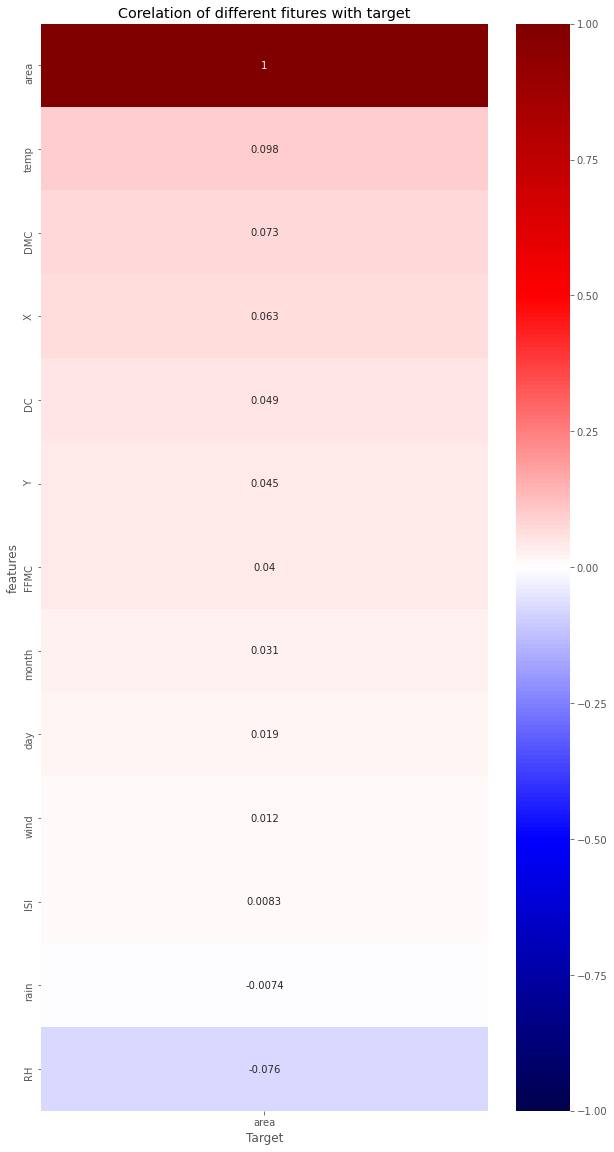

In [27]:
corr_new_train=df.corr()
plt.figure(figsize=(10,20))
sns.heatmap(corr_new_train[['area']].sort_values(by=['area'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)
plt.ylabel('features')
plt.xlabel('Target')
plt.title("Corelation of different fitures with target")
plt.show()

### Taking top 6 features for model building.

In [28]:
fs1 = ['X','Y','month','FFMC','DMC','DC','temp','area'] 

In [29]:
df_fs1 = df[fs1]
df_fs1.head()

,X,Y,month,FFMC,DMC,DC,temp,area
0,7,5,7,86.2,26.2,94.3,8.2,0.0
1,7,4,10,90.6,35.4,669.1,18.0,0.0
2,7,4,10,90.6,43.7,686.9,14.6,0.0
3,8,6,7,91.7,33.3,77.5,8.3,0.0
4,8,6,7,89.3,51.3,102.2,11.4,0.0


## Tran Test(val) Split:

In [30]:
SEED = 42

data = df_fs1.copy()
y = data['area']
x = data.drop(['area'],axis=1)


from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2,random_state = SEED)

#### I have tried normal Random forest, Random forest with no Randomized Search CV,xgboost and stacking of multiple ml models and the results are something like this.

|reg      |	rmse	|	mse	| r2	    |
|-|-|-|-|  
|simple_rf =|109.5595|12003.2882|-0.0182|
|rscv_rf = |108.3183|11732.8603|0.00465|
|rscv_xgboost = |108.7711|11831.1615|-0.00368|
|stacking = |109.0897|11900.57185|-0.0095|
|rf with rscv and feature selection =|106.35|11311.77|0.04|

<br>
PS: rscv is Randomized Search CV and rf is random forest.

So, the improvements in **rf with rscv and feature selection** are better, that's why I am keeping it.




## Model Building using Selected features:

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]



random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
reg_rf_rscv = RandomForestRegressor()

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search_rf = RandomizedSearchCV(reg_rf_rscv, random_grid,n_iter=5, n_jobs=1, cv=5,verbose=2)

In [35]:
random_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   47.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [36]:
random_search_rf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [37]:
base_model = RandomForestRegressor(n_estimators= 1200,
                                     min_samples_split= 10,
                                     min_samples_leaf= 2,
                                     max_features= 'auto',
                                     max_depth= 20,
                                     bootstrap= True,
                                    random_state = SEED)
base_model.fit(x_train, y_train)
# base_accuracy = evaluate(base_model, x_val,y_val)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1200, random_state=42)

In [38]:
y_pred_rf_rscv = base_model.predict(x_val)

In [39]:
def MSE(model_preds, ground_truths):
  return mean_squared_error(model_preds, ground_truths)

def MAE(model_preds, ground_truths):
  return mean_absolute_error(model_preds, ground_truths)

def Other_Err(model_preds, ground_truths):
  return r2_score( ground_truths,model_preds)

def RMSE(model_preds, ground_truths):
  return np.sqrt(mean_squared_error(model_preds, ground_truths))

In [40]:
print(f"mean squared error: {MSE(y_pred_rf_rscv,y_val)}")
print(f"mean absolute error: {MAE(y_pred_rf_rscv,y_val)}")
print(f"r2 error: {Other_Err(y_pred_rf_rscv,y_val)}")
print(f"root mean squared error: {RMSE(y_pred_rf_rscv,y_val)}")

mean squared error: 11311.779343111508
mean absolute error: 25.40632198990533
r2 error: 0.04037940134220108
root mean squared error: 106.35684906535877


### Cross Validation CV:

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [42]:
score = cross_val_score(reg_rf_rscv, x_train, y_train, cv=k_fold, n_jobs=1, scoring='r2')
print(score)

[ -0.42157318  -0.87683634  -0.36623432  -0.06128443  -1.26586351
  -0.06139915  -0.25249925 -13.21024059  -5.02628621  -2.04476064]


In [43]:
print('train r2 %2f' %(1 * score.mean()))

train r2 -2.358698


In [44]:
score_val = cross_val_score(reg_rf_rscv, x_val, y_val, cv=k_fold, n_jobs=1, scoring='r2')
print(score)

[ -0.42157318  -0.87683634  -0.36623432  -0.06128443  -1.26586351
  -0.06139915  -0.25249925 -13.21024059  -5.02628621  -2.04476064]


In [45]:
print('train r2 %2f' %(1 * score_val.mean()))

train r2 -58.765917


In [52]:
pd.DataFrame(score).iplot(title="R2 score of diferent CV for training data",xTitle = "count",yTitle="R2 Score")

In [51]:
pd.DataFrame(score_val).iplot(title="R2 score of diferent CV for validation data",xTitle = "count",yTitle="R2 Score")

# Metric Reports
 

| Metrics 	| Values 	| 
|-	|-	|
| MSE 	| 11311.77	|
| RMSE 	| 106.35 	|
| MAE 	| 25.40 	|
| R2 Score 	| 0.04 	|



In [53]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(reg_rf_rscv,open(filename,'wb'))

# Saved Model:

model link - https://drive.google.com/file/d/1isIoiZRKjQLzTdb2YiGa-nAnMUGvMmh6/view?usp=sharing